In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd
import glob
import datetime
import time

In [2]:
# создаем пустой датафрейм для хранения объединенных данных
df_all = pd.DataFrame()

# используем glob, чтобы получить список всех файлов .xlsx в каталоге
files = glob.glob(r'C:\Users\Max_Berdnikov\Desktop\Диплом\Данные с детекторов\Выгрузка 21.03\Выгрузка 21.03\А_Все общие файлы\*.xlsx')

# создаем цикл для добавления каждого файла в общий датафрейм
for file in files:
    df = pd.read_excel(file)
    df_all = df_all.append(df)

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_11072\2817528871.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_11072\2817528871.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_11072\2817528871.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_11072\2817528871.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_all = df_all.append(df)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipyker

In [14]:
df_all.dtypes

Дата фиксации      datetime64[ns]
Место фиксации             object
Направление                object
Полоса движения            object
ГРЗ                        object
Скорость                  float64
dtype: object

In [6]:
df_all['Дата фиксации'] = pd.to_datetime(df_all['Дата фиксации'])

In [7]:
#Сортируем всю таблицу по времени, чтобы в дальнейшем при итерации точки маршрута выстраивались в правильном порядке
df_all = df_all.sort_values(['Дата фиксации'])
#Обновляем индексацию
df_all = df_all.reset_index(drop = True)

In [8]:
df_all

,Дата фиксации,Место фиксации,Направление,Полоса движения,ГРЗ,Скорость
0,2023-03-20 07:00:00,"Россия, Белгородская область, г. Белгород , Ул...",К камере,2 (poly2),E957XH31,NaN
1,2023-03-20 07:00:00,"Россия, Белгородская область, г. Белгород , ул...",К камере,1 (poly1),O770KE31,NaN
2,2023-03-20 07:00:00,"Россия, Белгородская область, г. Белгород , ул...",К камере,2 (poly_2),O390BA31,NaN
3,2023-03-20 07:00:01,"Россия, Белгородская область, г. Белгород , пр...",К камере,2 (poly_2),T579MX31,NaN
4,2023-03-20 07:00:01,"Россия, Белгородская область, г. Белгород , пр...",К камере,2 (poly_2),P687BP31,NaN
...,...,...,...,...,...,...
92218,2023-03-20 09:00:59,"Россия, Белгородская область, г. Белгород , Пр...",К камере,3 (poly3),X247AY31,NaN
92219,2023-03-20 09:00:59,"Россия, Белгородская область, г. Белгород , Пр...",К камере,1 (poly1),A060HX31,NaN
92220,2023-03-20 09:00:59,"Россия, Белгородская область, г. Белгород , пр...",К камере,3 (poly3),T376MX31,NaN
92221,2023-03-20 09:00:59,"Россия, Белгородская область, г. Белгород , Пр...",К камере,3 (poly_3),H500MM61,NaN


In [9]:
df_all.drop_duplicates(subset=['ГРЗ', 'Дата фиксации'], inplace=True)

In [16]:
df_all

,Дата фиксации,Место фиксации,Направление,Полоса движения,ГРЗ,Скорость
0,2023-03-20 07:00:00,"Россия, Белгородская область, г. Белгород ,",К камере,2 (poly2),E957XH31,NaN
1,2023-03-20 07:00:00,"Россия, Белгородская область, г. Белгород ,",К камере,1 (poly1),O770KE31,NaN
2,2023-03-20 07:00:00,"Россия, Белгородская область, г. Белгород ,",К камере,2 (poly_2),O390BA31,NaN
3,2023-03-20 07:00:01,"Россия, Белгородская область, г. Белгород ,",К камере,2 (poly_2),T579MX31,NaN
4,2023-03-20 07:00:01,"Россия, Белгородская область, г. Белгород ,",К камере,2 (poly_2),P687BP31,NaN
...,...,...,...,...,...,...
92218,2023-03-20 09:00:59,"Россия, Белгородская область, г. Белгород ,",К камере,3 (poly3),X247AY31,NaN
92219,2023-03-20 09:00:59,"Россия, Белгородская область, г. Белгород ,",К камере,1 (poly1),A060HX31,NaN
92220,2023-03-20 09:00:59,"Россия, Белгородская область, г. Белгород ,",К камере,3 (poly3),T376MX31,NaN
92221,2023-03-20 09:00:59,"Россия, Белгородская область, г. Белгород ,",К камере,3 (poly_3),H500MM61,NaN


In [21]:
df_all

,Дата фиксации,Место фиксации,Направление,Полоса движения,ГРЗ,Скорость
0,2023-03-20 07:00:00,,К камере,2 (poly2),E957XH31,NaN
1,2023-03-20 07:00:00,,К камере,1 (poly1),O770KE31,NaN
2,2023-03-20 07:00:00,,К камере,2 (poly_2),O390BA31,NaN
3,2023-03-20 07:00:01,,К камере,2 (poly_2),T579MX31,NaN
4,2023-03-20 07:00:01,,К камере,2 (poly_2),P687BP31,NaN
...,...,...,...,...,...,...
92218,2023-03-20 09:00:59,,К камере,3 (poly3),X247AY31,NaN
92219,2023-03-20 09:00:59,,К камере,1 (poly1),A060HX31,NaN
92220,2023-03-20 09:00:59,,К камере,3 (poly3),T376MX31,NaN
92221,2023-03-20 09:00:59,,К камере,3 (poly_3),H500MM61,NaN


In [291]:
df_all['Место фиксации'] = df_all['Место фиксации'].replace('Россия, г. Белгород, Пр. Б.Хмельницкого – Белгородский пр-т', 
                                                            'Пр. Б.Хмельницкого – Белгородский пр-т')

In [20]:
df_all['Место фиксации'] = df_all['Место фиксации'].str.slice(start=44)

In [2]:
all_files = pd.read_excel(r'C:\Users\Max_Berdnikov\Desktop\Диплом\Данные с детекторов\Выгрузка 21.03\df_all22(обработан).xlsx')

In [5]:
all_files

,Дата фиксации,Место фиксации,Направление,Полоса движения,ГРЗ,Скорость
0,2023-03-20 07:00:00,Ул. Мичурина – ул. Садовая,К камере,2 (poly2),E957XH31,NaN
1,2023-03-20 07:00:00,Ул. Преображенская – ул. Чумичова,К камере,1 (poly1),O770KE31,NaN
2,2023-03-20 07:00:00,Ул. Попова – пр. Славы,К камере,2 (poly_2),O390BA31,NaN
3,2023-03-20 07:00:01,Гражданский пр. – ул. Белгородского полка,К камере,2 (poly_2),T579MX31,NaN
4,2023-03-20 07:00:01,Гражданский пр. – ул. Белгородского полка,К камере,2 (poly_2),P687BP31,NaN
...,...,...,...,...,...,...
92218,2023-03-20 09:00:59,Пр. Б.Хмельницкого – ул. Преображенская,К камере,3 (poly3),X247AY31,NaN
92219,2023-03-20 09:00:59,Пр. Белгородский - ул. Белгородского полка,К камере,1 (poly1),A060HX31,NaN
92220,2023-03-20 09:00:59,Пр. Славы – ул. Белгородского полка,К камере,3 (poly3),T376MX31,NaN
92221,2023-03-20 09:00:59,Пр. Б.Хмельницкого – Белгородский пр.,К камере,3 (poly_3),H500MM61,NaN


In [3]:
unique_names = all_files['Место фиксации'].unique()

In [26]:
unique_names

array(['Ул. Мичурина – ул. Садовая', 'Ул. Преображенская – ул. Чумичова',
       'Ул. Попова – пр. Славы',
       'Гражданский пр. – ул. Белгородского полка',
       'Ул. Студенческая – ул. Некрасова',
       'Пр. Б.Хмельницкого – ул. Мичурина',
       'Пр. Б.Хмельницкого – пр. Славы',
       'Пр. Б.Хмельницкого – ул. Невского',
       'Ул. Студенческая – ул. Садовая',
       'Пр. Б.Хмельницкого – Белгородский пр.',
       'Пр. Б.Хмельницкого – ул. Преображенская',
       'Пр. Б.Хмельницкого – ул. Железнякова',
       'Пр. Славы – ул. Н.Чумичова',
       'Пр. Славы – ул. Белгородского полка',
       'Ул. Преображенская – ул. Белгородского полка',
       'Ул. Попова – ул. Преображенская', 'Ул. Попова – Белгородский пр.',
       'Пр. Белгородский – ул. Н. Чумичова',
       'Пр. Белгородский - ул. Белгородского полка',
       'Пр. Б.Хмельницкого – ул. Студенческая',
       'Пр. Славы – ул. Преображенская'], dtype=object)

In [5]:
#создание списка с уникальными значениями ГРЗ, т.е. все встречавшиеся из общего массива
GRZ_list = []
for c in all_files['ГРЗ']:
    if c not in GRZ_list:
        GRZ_list.append(c)

In [32]:
print(len(GRZ_list))

34749


In [59]:
# Запрос случаев фиксаций по номеру ГРЗ
matches = all_files[all_files.iloc[:, 4] == input('Введите номер ГРЗ в формате Х000ХХ31: ')]
output_values = matches.iloc[:, [0, 1]]
output_values

Введите номер ГРЗ в формате Х000ХХ31: E890MO186


,Дата фиксации,Место фиксации
39,2023-03-20 07:00:10,Ул. Студенческая – ул. Садовая
184,2023-03-20 07:00:37,Ул. Студенческая – ул. Некрасова
320,2023-03-20 07:01:02,Пр. Б.Хмельницкого – ул. Студенческая
31954,2023-03-20 07:50:32,Пр. Б.Хмельницкого – ул. Преображенская
45578,2023-03-20 08:07:35,Пр. Б.Хмельницкого – пр. Славы
45830,2023-03-20 08:07:54,Пр. Б.Хмельницкого – ул. Преображенская
46407,2023-03-20 08:08:35,Пр. Б.Хмельницкого – Белгородский пр.
49014,2023-03-20 08:11:50,Пр. Б.Хмельницкого – ул. Студенческая
49929,2023-03-20 08:12:57,Ул. Студенческая – ул. Некрасова
56552,2023-03-20 08:20:58,Пр. Б.Хмельницкого – ул. Мичурина


In [9]:
len(unique_names)

21

In [4]:
GRZ_list = all_files['ГРЗ'].unique()

In [28]:
GRZ_list

array(['E957XH31', 'O770KE31', 'O390BA31', ..., 'K500AY31', 'A239XA31',
       'H500MM61'], dtype=object)

In [4]:
#создаем список маршрутов по каждому ГРЗ
import time 
start = time.time() ## точка отсчета времени


all_track_dict = {}            #словарь - {[ГРЗ : название пересечения1, пересечения2...], ...}
fixation_moment_dict = {}      #словарь - {[ГРЗ : время проезда пересечения1, пересечения2], ...}
for index, row in all_files.iterrows():
    grz = row['ГРЗ']
    crossroad = row['Место фиксации']     #берет часть строки из полного наименования места фиксации
    fixation_moment = row['Дата фиксации']
    if grz in all_track_dict:
        all_track_dict[grz].append(crossroad)
        fixation_moment_dict[grz].append(str(fixation_moment))
    else:
        all_track_dict[grz] = [crossroad]
        fixation_moment_dict[grz] = [str(fixation_moment)]

all_track_list = list(all_track_dict.values())

end = time.time() - start ## собственно время работы программы
print(end)

13.125326156616211


In [61]:
all_track_list

[['Ул. Мичурина – ул. Садовая', 'Ул. Мичурина – ул. Садовая'],
 ['Ул. Преображенская – ул. Чумичова', 'Пр. Белгородский – ул. Н. Чумичова'],
 ['Ул. Попова – пр. Славы', 'Ул. Студенческая – ул. Некрасова'],
 ['Гражданский пр. – ул. Белгородского полка',
  'Гражданский пр. – ул. Белгородского полка',
  'Пр. Белгородский - ул. Белгородского полка',
  'Ул. Мичурина – ул. Садовая',
  'Пр. Б.Хмельницкого – Белгородский пр.'],
 ['Гражданский пр. – ул. Белгородского полка'],
 ['Ул. Студенческая – ул. Некрасова'],
 ['Пр. Б.Хмельницкого – ул. Мичурина',
  'Пр. Б.Хмельницкого – ул. Невского',
  'Пр. Б.Хмельницкого – ул. Железнякова',
  'Пр. Б.Хмельницкого – ул. Студенческая',
  'Пр. Б.Хмельницкого – Белгородский пр.'],
 ['Ул. Попова – пр. Славы', 'Ул. Попова – ул. Преображенская'],
 ['Пр. Б.Хмельницкого – пр. Славы',
  'Пр. Б.Хмельницкого – ул. Мичурина',
  'Пр. Б.Хмельницкого – ул. Мичурина'],
 ['Пр. Б.Хмельницкого – ул. Невского'],
 ['Ул. Студенческая – ул. Садовая',
  'Гражданский пр. – ул. Бе

In [55]:
all_track_dict

{'E957XH31': ['Ул. Мичурина – ул. Садовая', 'Ул. Мичурина – ул. Садовая'],
 'O770KE31': ['Ул. Преображенская – ул. Чумичова',
  'Пр. Белгородский – ул. Н. Чумичова'],
 'O390BA31': ['Ул. Попова – пр. Славы', 'Ул. Студенческая – ул. Некрасова'],
 'T579MX31': ['Гражданский пр. – ул. Белгородского полка',
  'Гражданский пр. – ул. Белгородского полка',
  'Пр. Белгородский - ул. Белгородского полка',
  'Ул. Мичурина – ул. Садовая',
  'Пр. Б.Хмельницкого – Белгородский пр.'],
 'P687BP31': ['Гражданский пр. – ул. Белгородского полка'],
 'T763TT36': ['Ул. Студенческая – ул. Некрасова'],
 'B004EP31': ['Пр. Б.Хмельницкого – ул. Мичурина',
  'Пр. Б.Хмельницкого – ул. Невского',
  'Пр. Б.Хмельницкого – ул. Железнякова',
  'Пр. Б.Хмельницкого – ул. Студенческая',
  'Пр. Б.Хмельницкого – Белгородский пр.'],
 'O802TE31': ['Ул. Попова – пр. Славы', 'Ул. Попова – ул. Преображенская'],
 'X929YY152': ['Пр. Б.Хмельницкого – пр. Славы',
  'Пр. Б.Хмельницкого – ул. Мичурина',
  'Пр. Б.Хмельницкого – ул. Мичу

In [311]:
# Анализ средней скорости и времени движения каждого ТС от точки А до точки Б
# Старая версия
stat_list = []
Point_A = 'Ул. Студенческая – ул. Садовая'
Point_B = 'Ул. Студенческая – ул. Некрасова'

df_edge = pd.DataFrame()
df_edge = pd.DataFrame(columns=['ГРЗ', 'Начальная точка', 'Конечная точка', 'Время движения(Δt), с.', 'Средняя скорость, км/ч'])

for key in all_track_dict:
    for i in range(len(all_track_dict[key]) - 1):
        if all_track_dict[key][i] == Point_A and all_track_dict[key][i + 1] == Point_B:
            time1 = datetime.datetime.strptime(fixation_moment_dict[key][i], '%Y-%m-%d %H:%M:%S')
            time2 = datetime.datetime.strptime(fixation_moment_dict[key][i + 1], '%Y-%m-%d %H:%M:%S')
            time_diff = time2 - time1
            stat_list.append(str(time_diff))
            df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'Время движения(Δt), с.': time_diff.seconds, 'Средняя скорость, км/ч': 0.269 / (time_diff.seconds / 3600)}, ignore_index=True)
C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_5876\2869868483.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_edge = df_edge.append({'ГРЗ': key, 'В

In [312]:
df_edge['Время движения(Δt), с.'] = df_edge['Время движения(Δt), с.'].astype('int64')
df_edge['Начальная точка'] = Point_A
df_edge['Конечная точка'] = Point_B
df_edge

,ГРЗ,Начальная точка,Конечная точка,"Время движения(Δt), с.","Средняя скорость, км/ч"
0,E890MO186,Ул. Студенческая – ул. Садовая,Ул. Студенческая – ул. Некрасова,27,35.866667
1,E924PE31,Ул. Студенческая – ул. Садовая,Ул. Студенческая – ул. Некрасова,23,42.104348
2,O339OT31,Ул. Студенческая – ул. Садовая,Ул. Студенческая – ул. Некрасова,25,38.736000
3,T220YY31,Ул. Студенческая – ул. Садовая,Ул. Студенческая – ул. Некрасова,109,8.884404
4,T105XY31,Ул. Студенческая – ул. Садовая,Ул. Студенческая – ул. Некрасова,381,2.541732
...,...,...,...,...,...
1168,Y719CP31,Ул. Студенческая – ул. Садовая,Ул. Студенческая – ул. Некрасова,45,21.520000
1169,X305AH31,Ул. Студенческая – ул. Садовая,Ул. Студенческая – ул. Некрасова,44,22.009091
1170,O604MC31,Ул. Студенческая – ул. Садовая,Ул. Студенческая – ул. Некрасова,23,42.104348
1171,T228MH31,Ул. Студенческая – ул. Садовая,Ул. Студенческая – ул. Некрасова,41,23.619512


In [306]:
import numpy as np
import seaborn as sns

In [308]:
ab = df_edge.loc[df_edge["Время движения(Δt), с."] < 200]

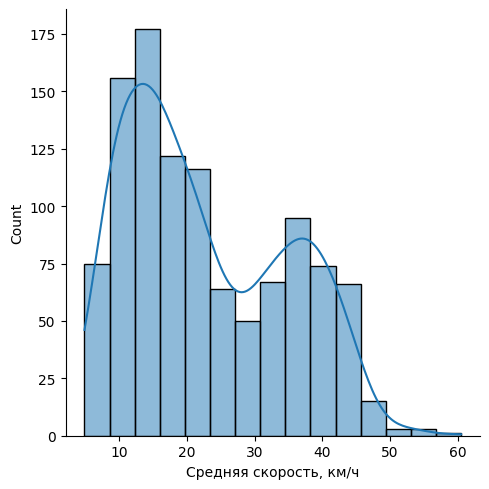

In [310]:
#make this example reproducible
np.random.seed (0)

#create data
x = ab["Средняя скорость, км/ч"]

#create normal distribution curve
sns.displot (x, kde= True )

In [9]:
matrix = pd.DataFrame(index=unique_names, columns=unique_names)
matrix.columns = [f'{name} (Б)' for name in matrix.columns]
matrix.index = [f'{label} (А)' for label in matrix.index]
matrix.fillna(0, inplace=True)    #заполняем таблицу нулями
matrix

,Ул. Мичурина – ул. Садовая (Б),Ул. Преображенская – ул. Чумичова (Б),Ул. Попова – пр. Славы (Б),Гражданский пр. – ул. Белгородского полка (Б),Ул. Студенческая – ул. Некрасова (Б),Пр. Б.Хмельницкого – ул. Мичурина (Б),Пр. Б.Хмельницкого – пр. Славы (Б),Пр. Б.Хмельницкого – ул. Невского (Б),Ул. Студенческая – ул. Садовая (Б),Пр. Б.Хмельницкого – Белгородский пр. (Б),...,Пр. Б.Хмельницкого – ул. Железнякова (Б),Пр. Славы – ул. Н.Чумичова (Б),Пр. Славы – ул. Белгородского полка (Б),Ул. Преображенская – ул. Белгородского полка (Б),Ул. Попова – ул. Преображенская (Б),Ул. Попова – Белгородский пр. (Б),Пр. Белгородский – ул. Н. Чумичова (Б),Пр. Белгородский - ул. Белгородского полка (Б),Пр. Б.Хмельницкого – ул. Студенческая (Б),Пр. Славы – ул. Преображенская (Б)
Ул. Мичурина – ул. Садовая (А),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ул. Преображенская – ул. Чумичова (А),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ул. Попова – пр. Славы (А),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Гражданский пр. – ул. Белгородского полка (А),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ул. Студенческая – ул. Некрасова (А),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Пр. Б.Хмельницкого – ул. Мичурина (А),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Пр. Б.Хмельницкого – пр. Славы (А),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Пр. Б.Хмельницкого – ул. Невского (А),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ул. Студенческая – ул. Садовая (А),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Пр. Б.Хмельницкого – Белгородский пр. (А),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#Создание матрицы корреспонденций. Вариант, с полноценными маршрутами (РАБОТАЕТ!!!)
counter_1 = 0       #в маршруте содержится только 1-но пересечение

for i in range(len(all_track_list)):
    if len(all_track_list[i]) > 1:
        for j in range(len(all_track_list[i]) - 1):
            matrix.loc[all_track_list[i][j] + ' (А)', all_track_list[i][j + 1] + ' (Б)'] += 1         #Точка А - название столбца, точка Б - название строки
    else:
        counter_1 +=1

In [11]:
matrix.columns = matrix.columns.str.replace(' (Б)', '', regex=False)
matrix.index = matrix.index.str.replace(' (А)', '', regex=False) 

In [19]:
pd.set_option('display.max_rows', 7)
pd.set_option('display.max_columns', 9)

In [1]:
matrix

NameError: name 'matrix' is not defined

In [47]:
#Перестраивание таблицы для дальнейшего использования
s = matrix.stack()
new_matrix = s.reset_index()
new_matrix.columns = ['Начальная точка', 'Конечная точка', 'Кол-во ТС']
new_matrix

,Начальная точка,Конечная точка,Кол-во ТС
0,Ул. Мичурина – ул. Садовая,Ул. Мичурина – ул. Садовая,553
1,Ул. Мичурина – ул. Садовая,Ул. Преображенская – ул. Чумичова,7
2,Ул. Мичурина – ул. Садовая,Ул. Попова – пр. Славы,10
3,Ул. Мичурина – ул. Садовая,Гражданский пр. – ул. Белгородского полка,11
4,Ул. Мичурина – ул. Садовая,Ул. Студенческая – ул. Некрасова,126
...,...,...,...
436,Пр. Славы – ул. Преображенская,Ул. Попова – Белгородский пр.,3
437,Пр. Славы – ул. Преображенская,Пр. Белгородский – ул. Н. Чумичова,0
438,Пр. Славы – ул. Преображенская,Пр. Белгородский - ул. Белгородского полка,1
439,Пр. Славы – ул. Преображенская,Пр. Б.Хмельницкого – ул. Студенческая,16


In [58]:
# Создаем словарь с уникальными идентификаторами пересечений
crossroad_id_dict = {}
for i in range(len(unique_names)):
    crossroad_id_dict[unique_names[i]] = i + 1

In [59]:
crossroad_id_dict

{'Ул. Мичурина – ул. Садовая': 1,
 'Ул. Преображенская – ул. Чумичова': 2,
 'Ул. Попова – пр. Славы': 3,
 'Гражданский пр. – ул. Белгородского полка': 4,
 'Ул. Студенческая – ул. Некрасова': 5,
 'Пр. Б.Хмельницкого – ул. Мичурина': 6,
 'Пр. Б.Хмельницкого – пр. Славы': 7,
 'Пр. Б.Хмельницкого – ул. Невского': 8,
 'Ул. Студенческая – ул. Садовая': 9,
 'Пр. Б.Хмельницкого – Белгородский пр.': 10,
 'Пр. Б.Хмельницкого – ул. Преображенская': 11,
 'Пр. Б.Хмельницкого – ул. Железнякова': 12,
 'Пр. Славы – ул. Н.Чумичова': 13,
 'Пр. Славы – ул. Белгородского полка': 14,
 'Ул. Преображенская – ул. Белгородского полка': 15,
 'Ул. Попова – ул. Преображенская': 16,
 'Ул. Попова – Белгородский пр.': 17,
 'Пр. Белгородский – ул. Н. Чумичова': 18,
 'Пр. Белгородский - ул. Белгородского полка': 19,
 'Пр. Б.Хмельницкого – ул. Студенческая': 20,
 'Пр. Славы – ул. Преображенская': 21}

In [133]:
new_matrix = new_matrix.replace(crossroad_id_dict)

In [134]:
new_matrix

,Начальная точка,Конечная точка,Кол-во ТС
0,1,1,553
1,1,2,7
2,1,3,10
3,1,4,11
4,1,5,126
...,...,...,...
436,21,17,3
437,21,18,0
438,21,19,1
439,21,20,16


In [ ]:
matrix.to_excel(r'C:\Users\Max_Berdnikov\Desktop\matrix.xlsx', index = False)

In [51]:
# Создание пустой матрицы
matrix = pd.DataFrame(index=unique_names, columns=unique_names)
matrix.fillna(0, inplace=True)    #заполняем таблицу нулями

# Заполнение матрицы корреспонденций 
counter_1 = 0      
for i in range(len(all_track_list)):
    if len(all_track_list[i]) > 1:
        for j in range(len(all_track_list[i]) - 1):
            matrix.loc[all_track_list[i][j], all_track_list[i][j + 1]] += 1
    else:
        counter_1 +=1

In [88]:
new_matrix.rename(columns = {'Начальная точка':'origin_id', 'Конечная точка':'destinatio', 'Кол-во ТС':'moving'}, inplace = True)

In [95]:
new_matrix

,origin_id,destinatio,moving
0,1,1,553
1,1,2,7
2,1,3,10
3,1,4,11
4,1,5,126
...,...,...,...
436,21,17,3
437,21,18,0
438,21,19,1
439,21,20,16


In [60]:
new_matrix = new_matrix.replace(crossroad_id_dict)

In [62]:
import geopandas as gpd

In [96]:
matrix_qgis = gpd.read_file(r'C:\Users\Max_Berdnikov\Desktop\Диплом\Qgis\shp для pandas (пересечения)\matrix_21.shp', encoding = 'utf-8')

In [97]:
matrix_qgis = matrix_qgis.astype({'origin_id': np.int64, 'destinatio': np.int64})

In [98]:
merged = matrix_qgis.merge(new_matrix, on=['origin_id', 'destinatio'])

In [99]:
merged = merged.drop(merged[merged['origin_id'] == merged['destinatio']].index)

In [100]:
merged

,origin_id,destinatio,entry_cost,network_co,exit_cost,total_cost,geometry,moving
1,6,20,0.0,0.006549,0.0,0.006549,"LINESTRING (36.57875 50.61165, 36.57621 50.62061)",1499
2,6,9,0.0,0.010580,0.0,0.010580,"LINESTRING (36.57875 50.61165, 36.58496 50.62165)",31
3,6,5,0.0,0.008887,0.0,0.008887,"LINESTRING (36.57875 50.61165, 36.58128 50.62120)",159
4,6,1,0.0,0.004253,0.0,0.004253,"LINESTRING (36.57875 50.61165, 36.58768 50.61280)",464
5,6,12,0.0,0.014756,0.0,0.014756,"LINESTRING (36.57875 50.61165, 36.57287 50.63181)",147
...,...,...,...,...,...,...,...,...
435,4,19,0.0,0.005295,0.0,0.005295,"LINESTRING (36.60080 50.59353, 36.60305 50.60075)",84
436,4,2,0.0,0.006507,0.0,0.006507,"LINESTRING (36.60080 50.59353, 36.59336 50.59815)",49
437,4,13,0.0,0.005621,0.0,0.005621,"LINESTRING (36.60080 50.59353, 36.59289 50.59690)",66
438,4,14,0.0,0.001601,0.0,0.001601,"LINESTRING (36.60080 50.59353, 36.60146 50.59571)",1166


In [101]:
merged.to_file(r'C:\Users\Max_Berdnikov\Desktop\Диплом\Qgis\shp для pandas (пересечения)\matrix_21.shp')

# Майский вариант

### 3.4 Построение матриц корреспонденции

In [6]:
# Создание пустой матрицы
matrix = pd.DataFrame(index=unique_names, columns=unique_names)
matrix.fillna(0, inplace=True)    #заполняем таблицу нулями

# Заполнение матрицы корреспонденций 
counter_1 = 0      
for i in range(len(all_track_list)):
    if len(all_track_list[i]) > 1:
        for j in range(len(all_track_list[i]) - 1):
            matrix.loc[all_track_list[i][j], all_track_list[i][j + 1]] += 1
    else:
        counter_1 += 1

In [7]:
matrix

,Ул. Мичурина – ул. Садовая,Ул. Преображенская – ул. Чумичова,Ул. Попова – пр. Славы,Гражданский пр. – ул. Белгородского полка,Ул. Студенческая – ул. Некрасова,Пр. Б.Хмельницкого – ул. Мичурина,Пр. Б.Хмельницкого – пр. Славы,Пр. Б.Хмельницкого – ул. Невского,Ул. Студенческая – ул. Садовая,Пр. Б.Хмельницкого – Белгородский пр.,...,Пр. Б.Хмельницкого – ул. Железнякова,Пр. Славы – ул. Н.Чумичова,Пр. Славы – ул. Белгородского полка,Ул. Преображенская – ул. Белгородского полка,Ул. Попова – ул. Преображенская,Ул. Попова – Белгородский пр.,Пр. Белгородский – ул. Н. Чумичова,Пр. Белгородский - ул. Белгородского полка,Пр. Б.Хмельницкого – ул. Студенческая,Пр. Славы – ул. Преображенская
Ул. Мичурина – ул. Садовая,553,7,10,11,126,631,3,26,283,40,...,52,1,3,13,58,330,255,68,69,11
Ул. Преображенская – ул. Чумичова,22,38,59,20,0,25,55,0,1,37,...,2,447,9,3,901,4,505,14,3,71
Ул. Попова – пр. Славы,72,62,76,91,1,11,32,2,2,32,...,0,1191,141,11,571,10,17,4,2,11
Гражданский пр. – ул. Белгородского полка,19,49,56,292,6,5,29,6,67,25,...,4,66,1166,499,31,7,304,84,1,14
Ул. Студенческая – ул. Некрасова,89,2,0,7,402,77,1,27,1093,23,...,27,1,0,3,0,4,6,3,1141,4
Пр. Б.Хмельницкого – ул. Мичурина,464,1,2,7,159,241,42,31,31,1127,...,147,2,0,2,8,63,38,3,1499,100
Пр. Б.Хмельницкого – пр. Славы,9,11,847,43,7,195,121,6,3,333,...,5,188,21,3,88,16,7,2,18,16
Пр. Б.Хмельницкого – ул. Невского,8,1,3,5,55,45,7,316,94,41,...,1475,2,0,6,1,8,2,0,291,12
Ул. Студенческая – ул. Садовая,431,1,3,82,1173,17,4,99,291,5,...,191,3,10,43,7,13,6,20,69,1
Пр. Б.Хмельницкого – Белгородский пр.,56,6,25,12,24,1446,176,7,9,166,...,16,6,1,1,31,899,158,27,105,168


In [11]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

C:\Users\Max_Berdnikov\AppData\Local\Temp\ipykernel_14408\3406856685.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('png')


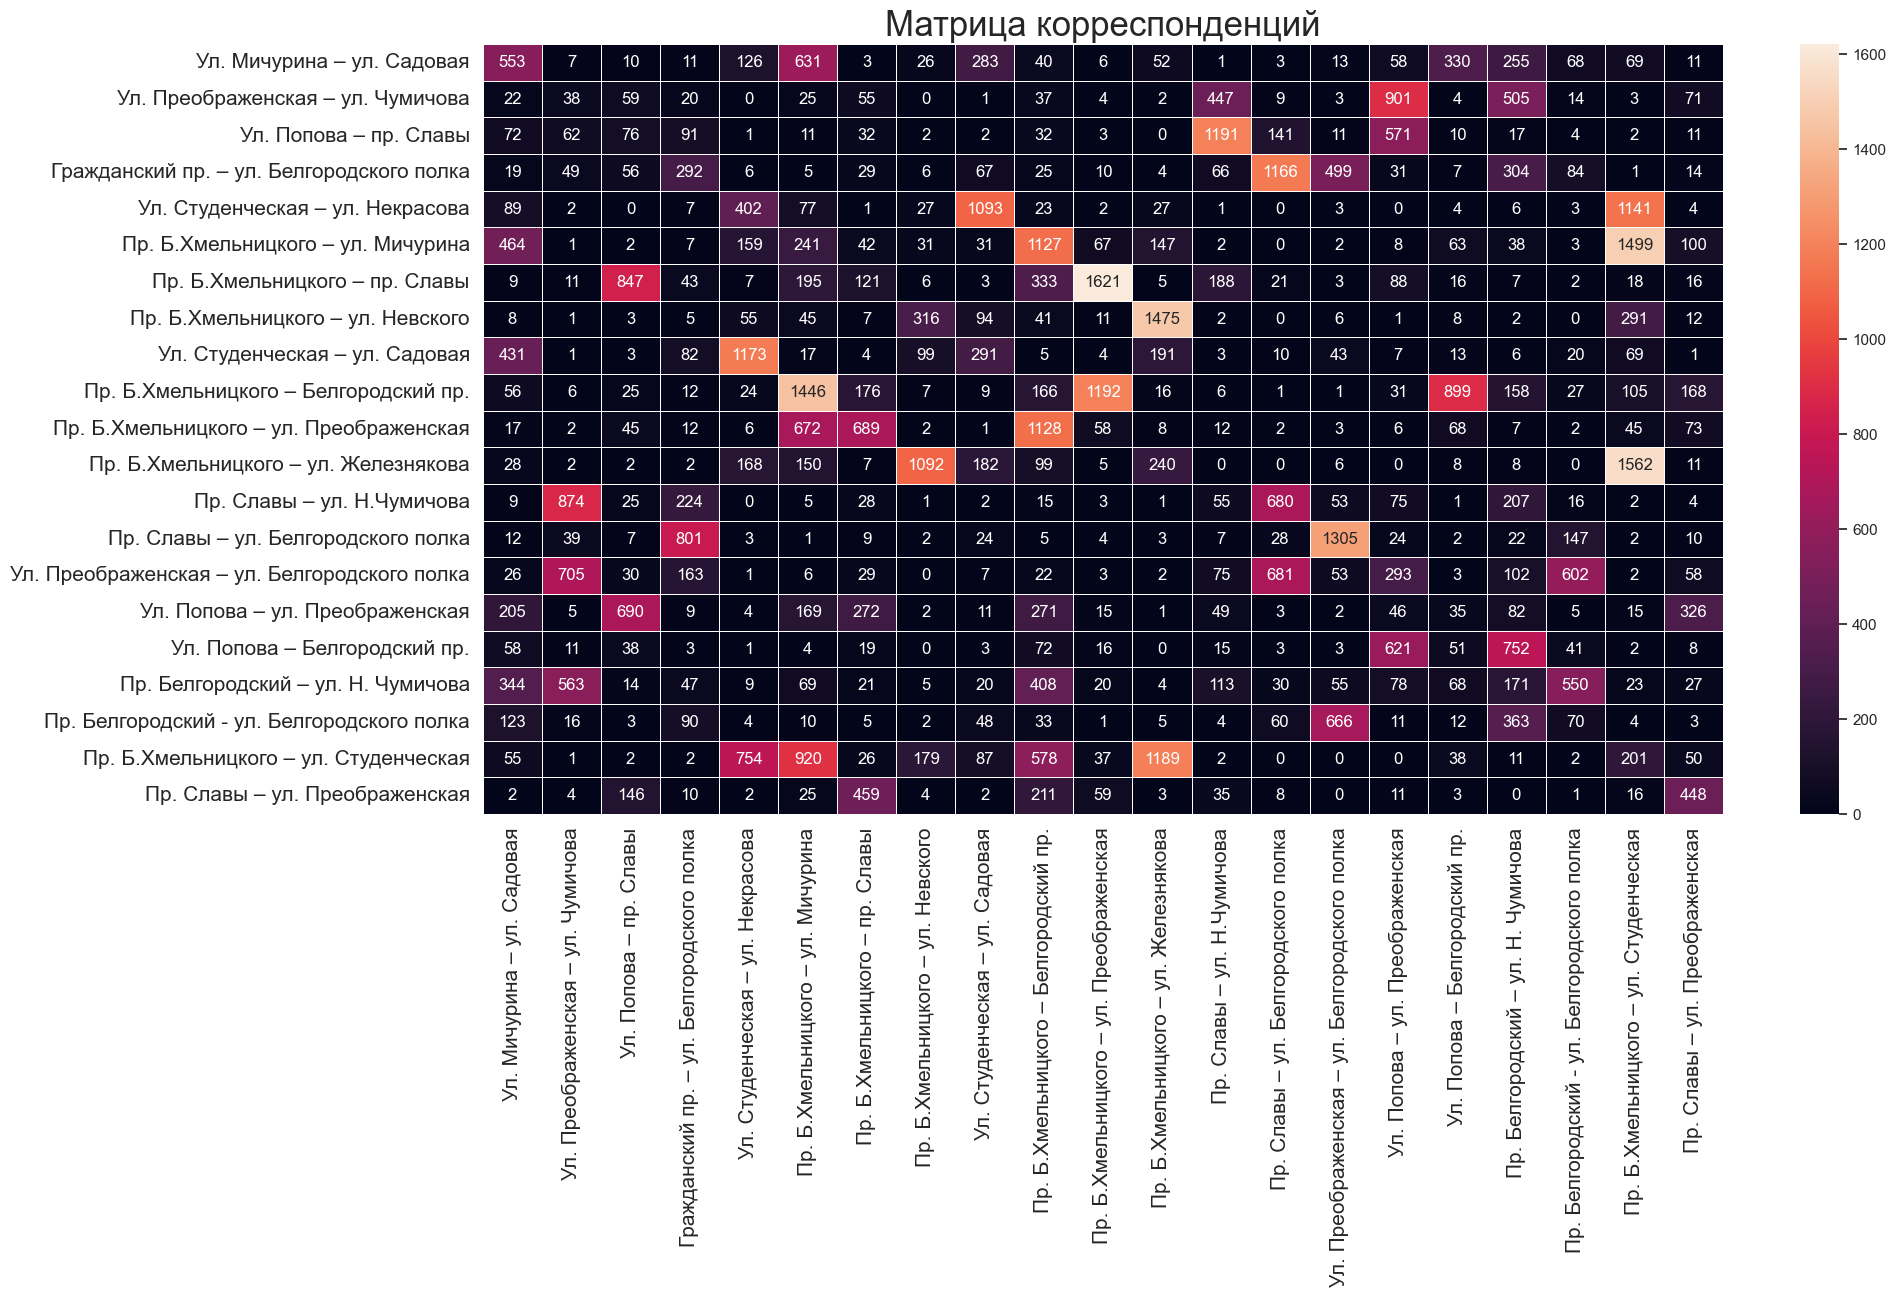

In [19]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1)
sns.heatmap(matrix, linewidths=0.5, annot=True, fmt='d')
plt.title('Матрица корреспонденций', fontsize=25)
plt.tick_params(axis='both', which='major', labelsize= 15)
fig.savefig(r'C:\Users\Max_Berdnikov\Desktop\matrix2.png', bbox_inches = 'tight', transparent=True, dpi=300)

In [33]:
s = matrix.stack()
new_matrix = s.reset_index()
new_matrix.columns = ['Начальная точка', 'Конечная точка', 'Кол-во ТС']

In [34]:
new_matrix

,Начальная точка,Конечная точка,Кол-во ТС
0,Ул. Мичурина – ул. Садовая,Ул. Мичурина – ул. Садовая,553
1,Ул. Мичурина – ул. Садовая,Ул. Преображенская – ул. Чумичова,7
2,Ул. Мичурина – ул. Садовая,Ул. Попова – пр. Славы,10
...,...,...,...
438,Пр. Славы – ул. Преображенская,Пр. Белгородский - ул. Белгородского полка,1
439,Пр. Славы – ул. Преображенская,Пр. Б.Хмельницкого – ул. Студенческая,16
440,Пр. Славы – ул. Преображенская,Пр. Славы – ул. Преображенская,448


### 3.4.1 Матрица для транспортных зон

In [35]:
unique_names

array(['Ул. Мичурина – ул. Садовая', 'Ул. Преображенская – ул. Чумичова',
       'Ул. Попова – пр. Славы',
       'Гражданский пр. – ул. Белгородского полка',
       'Ул. Студенческая – ул. Некрасова',
       'Пр. Б.Хмельницкого – ул. Мичурина',
       'Пр. Б.Хмельницкого – пр. Славы',
       'Пр. Б.Хмельницкого – ул. Невского',
       'Ул. Студенческая – ул. Садовая',
       'Пр. Б.Хмельницкого – Белгородский пр.',
       'Пр. Б.Хмельницкого – ул. Преображенская',
       'Пр. Б.Хмельницкого – ул. Железнякова',
       'Пр. Славы – ул. Н.Чумичова',
       'Пр. Славы – ул. Белгородского полка',
       'Ул. Преображенская – ул. Белгородского полка',
       'Ул. Попова – ул. Преображенская', 'Ул. Попова – Белгородский пр.',
       'Пр. Белгородский – ул. Н. Чумичова',
       'Пр. Белгородский - ул. Белгородского полка',
       'Пр. Б.Хмельницкого – ул. Студенческая',
       'Пр. Славы – ул. Преображенская'], dtype=object)

In [36]:
# Определяем транспортные зоны и принадлежащие им пересечения улиц
t_areas = {
    1: ['Ул. Преображенская – ул. Чумичова', 'Ул. Попова – пр. Славы', 'Гражданский пр. – ул. Белгородского полка',
       'Пр. Б.Хмельницкого – пр. Славы', 'Пр. Б.Хмельницкого – Белгородский пр.', 'Пр. Б.Хмельницкого – ул. Преображенская',
       'Пр. Славы – ул. Н.Чумичова', 'Пр. Славы – ул. Белгородского полка', 'Ул. Преображенская – ул. Белгородского полка',
       'Ул. Попова – ул. Преображенская', 'Ул. Попова – Белгородский пр.', 'Пр. Белгородский – ул. Н. Чумичова',
       'Пр. Белгородский - ул. Белгородского полка'],
    2: ['Ул. Мичурина – ул. Садовая', 'Ул. Студенческая – ул. Некрасова', 'Пр. Б.Хмельницкого – ул. Мичурина',
       'Пр. Б.Хмельницкого – ул. Невского', 'Ул. Студенческая – ул. Садовая'],
    3: ['Пр. Б.Хмельницкого – ул. Железнякова', 'Пр. Б.Хмельницкого – ул. Студенческая', 'Пр. Славы – ул. Преображенская']}

# Создание матрицы
num_zones = len(t_areas)
area_matrix_df = pd.DataFrame({'Начальная зона': np.repeat(np.arange(1, num_zones+1), num_zones), 'Конечная зона': np.tile(np.arange(1, num_zones+1), num_zones),'Количество ТС': np.zeros(num_zones**2, dtype=int)})

# Заполняем 3-ий столбец датафрейма
for track in all_track_list:
    for i in range(len(track) - 1):
        start_zone = None
        end_zone = None
        # Определяем зону, содержащую начальное пересечение
        for zone, intersections in t_areas.items():
            if track[i] in intersections:
                start_zone = zone
                break
        # Определяем зону, содержащую конечное пересечение
        for zone, intersections in t_areas.items():
            if track[i+1] in intersections:
                end_zone = zone
                break
        if start_zone is not None and end_zone is not None:
            # Обновляем подсчет в матрице, используя id зон
            area_matrix_df.loc[(area_matrix_df['Начальная зона'] == start_zone) &
            (area_matrix_df['Конечная зона'] == end_zone), 'Количество ТС'] += 1

In [72]:
area_matrix_df

,origin_id,destinatio,moving
0,1,1,29008
1,1,2,3889
2,1,3,1064
3,2,1,2507
4,2,2,6762
5,2,3,5089
6,3,1,1785
7,3,2,3650
8,3,3,3720


In [40]:
area_matrix_df.rename(columns = {'Начальная зона':'origin_id', 'Конечная зона':'destinatio', 'Количество ТС':'moving'}, inplace = True)

In [41]:
area_matrix_df

,origin_id,destinatio,moving
0,1,1,29008
1,1,2,3889
2,1,3,1064
...,...,...,...
6,3,1,1785
7,3,2,3650
8,3,3,3720


In [42]:
import geopandas as gpd

In [71]:
pd.set_option('display.max_row', 15)

In [69]:
matrix_area = gpd.read_file(r'C:\Users\Max_Berdnikov\Desktop\Диплом\Qgis\shp для pandas (пересечения)\Area_matrix.shp', encoding = 'utf-8')

In [70]:
matrix_area

,origin_id,destinatio,entry_cost,network_co,exit_cost,total_cost,moving,geometry
0,3,3,0.000000,0.000000,0.000000,0.000000,3720,None
1,3,2,0.000122,0.015636,0.000519,0.016278,3650,"LINESTRING (36.55819 50.61852, 36.58770 50.61792)"
2,3,1,0.000122,0.022819,0.000287,0.023229,1785,"LINESTRING (36.55819 50.61852, 36.58469 50.59888)"
...,...,...,...,...,...,...,...,...
6,1,3,0.000287,0.022819,0.000122,0.023229,1064,"LINESTRING (36.58469 50.59888, 36.55819 50.61852)"
7,1,2,0.000287,0.018977,0.000519,0.019783,3889,"LINESTRING (36.58469 50.59888, 36.58770 50.61792)"
8,1,1,0.000000,0.000000,0.000000,0.000000,29008,"LINESTRING (36.58469 50.59888, 36.58770 50.61792)"


In [65]:
matrix_area = matrix_area.astype({'origin_id': np.int64, 'destinatio': np.int64})

In [55]:
merged_area = matrix_area.merge(area_matrix_df, on=['origin_id', 'destinatio'])

In [68]:
merged_area.to_file(r'C:\Users\Max_Berdnikov\Desktop\Диплом\Qgis\shp для pandas (пересечения)\Area_matrix.shp')

In [20]:
fixation_moment_dict

{'E957XH31': ['2023-03-20 07:00:00', '2023-03-20 07:03:24'],
 'O770KE31': ['2023-03-20 07:00:00', '2023-03-20 07:01:11'],
 'O390BA31': ['2023-03-20 07:00:00', '2023-03-20 07:07:04'],
 'T579MX31': ['2023-03-20 07:00:01',
  '2023-03-20 08:09:01',
  '2023-03-20 08:11:05',
  '2023-03-20 08:20:04',
  '2023-03-20 08:27:44'],
 'P687BP31': ['2023-03-20 07:00:01'],
 'T763TT36': ['2023-03-20 07:00:01'],
 'B004EP31': ['2023-03-20 07:00:01',
  '2023-03-20 08:26:37',
  '2023-03-20 08:27:55',
  '2023-03-20 08:29:41',
  '2023-03-20 08:32:43'],
 'O802TE31': ['2023-03-20 07:00:01', '2023-03-20 07:00:36'],
 'X929YY152': ['2023-03-20 07:00:01',
  '2023-03-20 07:02:34',
  '2023-03-20 07:02:36'],
 'H447PE31': ['2023-03-20 07:00:02'],
 'A665EC198': ['2023-03-20 07:00:02',
  '2023-03-20 07:39:48',
  '2023-03-20 07:42:31',
  '2023-03-20 07:43:31',
  '2023-03-20 07:47:41',
  '2023-03-20 07:48:12',
  '2023-03-20 07:49:05',
  '2023-03-20 07:59:34',
  '2023-03-20 08:03:23',
  '2023-03-20 08:05:11',
  '2023-03-20 

In [25]:
all_track_dict

{'E957XH31': ['Ул. Мичурина – ул. Садовая', 'Ул. Мичурина – ул. Садовая'],
 'O770KE31': ['Ул. Преображенская – ул. Чумичова',
  'Пр. Белгородский – ул. Н. Чумичова'],
 'O390BA31': ['Ул. Попова – пр. Славы', 'Ул. Студенческая – ул. Некрасова'],
 'T579MX31': ['Гражданский пр. – ул. Белгородского полка',
  'Гражданский пр. – ул. Белгородского полка',
  'Пр. Белгородский - ул. Белгородского полка',
  'Ул. Мичурина – ул. Садовая',
  'Пр. Б.Хмельницкого – Белгородский пр.'],
 'P687BP31': ['Гражданский пр. – ул. Белгородского полка'],
 'T763TT36': ['Ул. Студенческая – ул. Некрасова'],
 'B004EP31': ['Пр. Б.Хмельницкого – ул. Мичурина',
  'Пр. Б.Хмельницкого – ул. Невского',
  'Пр. Б.Хмельницкого – ул. Железнякова',
  'Пр. Б.Хмельницкого – ул. Студенческая',
  'Пр. Б.Хмельницкого – Белгородский пр.'],
 'O802TE31': ['Ул. Попова – пр. Славы', 'Ул. Попова – ул. Преображенская'],
 'X929YY152': ['Пр. Б.Хмельницкого – пр. Славы',
  'Пр. Б.Хмельницкого – ул. Мичурина',
  'Пр. Б.Хмельницкого – ул. Мичу

# Анализ маршрутов движения

In [35]:
from collections import Counter

value_counts = Counter(tuple(value) for value in all_track_dict.values() if len(value) > 1)

value_counts

Counter({('Ул. Мичурина – ул. Садовая', 'Ул. Мичурина – ул. Садовая'): 38,
         ('Ул. Преображенская – ул. Чумичова',
          'Пр. Белгородский – ул. Н. Чумичова'): 22,
         ('Ул. Попова – пр. Славы', 'Ул. Студенческая – ул. Некрасова'): 1,
         ('Гражданский пр. – ул. Белгородского полка',
          'Гражданский пр. – ул. Белгородского полка',
          'Пр. Белгородский - ул. Белгородского полка',
          'Ул. Мичурина – ул. Садовая',
          'Пр. Б.Хмельницкого – Белгородский пр.'): 1,
         ('Пр. Б.Хмельницкого – ул. Мичурина',
          'Пр. Б.Хмельницкого – ул. Невского',
          'Пр. Б.Хмельницкого – ул. Железнякова',
          'Пр. Б.Хмельницкого – ул. Студенческая',
          'Пр. Б.Хмельницкого – Белгородский пр.'): 1,
         ('Ул. Попова – пр. Славы', 'Ул. Попова – ул. Преображенская'): 176,
         ('Пр. Б.Хмельницкого – пр. Славы',
          'Пр. Б.Хмельницкого – ул. Мичурина',
          'Пр. Б.Хмельницкого – ул. Мичурина'): 4,
         ('Ул. Студ